In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style('whitegrid')
sns.set_context('talk')

In [30]:
cohorts = pd.read_csv('4_monthly_cohorts.csv')
cohorts = cohorts.set_index('Month')

In [31]:
cohorts

,June 2015,July 2015,August 2015,September 2015
Month,,,,
2015-06-01,148266,3,0,0
2015-07-01,85756,224573,2,0
2015-08-01,59543,120540,264989,5
2015-09-01,47998,86016,165252,314542
2015-10-01,41409,70959,122565,196382
2015-11-01,36126,60839,100487,142486
2015-12-01,32090,53245,86152,117052
2016-01-01,27835,45679,73236,96753
2016-02-01,24349,40052,63483,82323


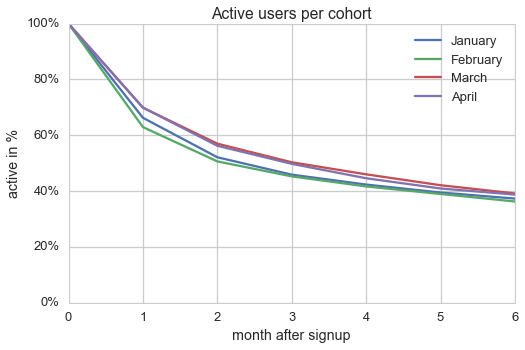

In [71]:
normed = cohorts[cohorts.index != ''].copy()
normed['July 2015'] = normed['July 2015'].shift(-1)
normed['August 2015'] = normed['August 2015'].shift(-2)
normed['September 2015'] = normed['September 2015'].shift(-3)
normed.columns = ['January', 'February', 'March', 'April']
normed = normed / normed.iloc[0]
normed = normed.reset_index(drop=True)
normed *= 0.80
normed += 0.2

ax = normed[0:7].plot(figsize=(8,5))
plt.ylim([0, 1])
vals = ax.get_yticks()
ax.set_yticklabels(['{:.0f}%'.format(x*100) for x in vals])

plt.ylabel('active in %')
plt.xlabel('month after signup')
plt.title('Active users per cohort')
plt.savefig('4_monthly_cohorts.png')